# Mining GitHub

## goal
- mine GitHub's API to discover patterns of social collaboration
- use NetworkX to perform graph-oriented analysis

## what we'll cover
- github's developer platform and how to make API requests
- graph schemas and how to model property graphs with NetworkX
- the concept of an interest graph and how to construct an interest graph from GitHub data that associate software developers, projects, programming languages, and other aspects of software development
- using NetworkX to query property graphs

## references
- [Mining the Social Web, 2nd Edition by Matthew A. Russell Chapter 7](https://github.com/ptwobrussell/Mining-the-Social-Web)
- [NetworkX Docs](https://networkx.github.io/documentation/stable/index.html)
- [PyGithub Docs](https://pygithub.readthedocs.io/en/latest/)
- [GitHub API](https://developer.github.com/v3/)

## presentation links
- [slides](https://docs.google.com/presentation/d/1lj9fSZCQ7wnT6th7n6CSAwxoIdWUQsss-ZuyD3rJd2I/edit?usp=sharing)
- [collab](https://colab.research.google.com/drive/1JyYr3lz_Ymik1Q3sl591yn-1zk0oOQPu)

# Programmatically obtaining a personal API access token for accessing GitHub's API

In [1]:
# pip install requests
import json
import requests

In [2]:
username = '' # Your GitHub username
password = '' # Your GitHub password

# Note that credentials will be transmitted over a secure SSL connection
url = 'https://api.github.com/authorizations'
note = 'Mining the Social Web, 2nd Ed.'
post_data = {'scopes':['repo'],'note': note }

response = requests.post(
    url,
    auth = (username, password),
    data = json.dumps(post_data),
    )   

print("API response:", response.text)
print('\n')
print("Your OAuth token is", response.json()['token'])

# Go to https://github.com/settings/applications to revoke this token

API response: {"id":290574777,"url":"https://api.github.com/authorizations/290574777","app":{"name":"Mining the Social Web, 2nd Ed.","url":"https://developer.github.com/v3/oauth_authorizations/","client_id":"00000000000000000000"},"token":"85f4eb4f3d2b81bc098d4d61182a9d3f8b7fceac","hashed_token":"78466507e63f2ef91f63a618ac760ea46f51c3d3f6a4313775a2667c47b3377a","token_last_eight":"8b7fceac","note":"Mining the Social Web, 2nd Ed.","note_url":null,"created_at":"2019-05-18T05:24:19Z","updated_at":"2019-05-18T05:24:19Z","scopes":["repo"],"fingerprint":null}


Your OAuth token is 85f4eb4f3d2b81bc098d4d61182a9d3f8b7fceac


# Making direct HTTP requests to GitHub's API

In [2]:
# An unauthenticated request that doesn't contain an access_token=xxx query string
url = "https://api.github.com/repos/ptwobrussell/Mining-the-Social-Web/stargazers"
response = requests.get(url)

# Display one stargazer

print(json.dumps(response.json()[0], indent=1))

# Display headers
for (k,v) in response.headers.items():
    print(k, "=>", v)

{
 "login": "rdempsey",
 "id": 224,
 "node_id": "MDQ6VXNlcjIyNA==",
 "avatar_url": "https://avatars2.githubusercontent.com/u/224?v=4",
 "gravatar_id": "",
 "url": "https://api.github.com/users/rdempsey",
 "html_url": "https://github.com/rdempsey",
 "followers_url": "https://api.github.com/users/rdempsey/followers",
 "following_url": "https://api.github.com/users/rdempsey/following{/other_user}",
 "gists_url": "https://api.github.com/users/rdempsey/gists{/gist_id}",
 "starred_url": "https://api.github.com/users/rdempsey/starred{/owner}{/repo}",
 "subscriptions_url": "https://api.github.com/users/rdempsey/subscriptions",
 "organizations_url": "https://api.github.com/users/rdempsey/orgs",
 "repos_url": "https://api.github.com/users/rdempsey/repos",
 "events_url": "https://api.github.com/users/rdempsey/events{/privacy}",
 "received_events_url": "https://api.github.com/users/rdempsey/received_events",
 "type": "User",
 "site_admin": false
}
Date => Sat, 18 May 2019 16:34:07 GMT
Content-Type

# Using PyGithub to query for stargazers of a particular repository

In [3]:
# pip install PyGithub
from github import Github

In [5]:
# XXX: Specify your own access token here
ACCESS_TOKEN = '85f4eb4f3d2b81bc098d4d61182a9d3f8b7fceac'

# Specify a username and repository of interest for that user.

USER = 'ptwobrussell'
REPO = 'Mining-the-Social-Web'

client = Github(ACCESS_TOKEN, per_page=100)
user = client.get_user(USER)
repo = user.get_repo(REPO)

# Get a list of people who have bookmarked the repo.
# Since you'll get a lazy iterator back, you have to traverse
# it if you want to get the total number of stargazers.

stargazers = [ s for s in repo.get_stargazers() ]
print("Number of stargazers", len(stargazers))

Number of stargazers 1178


PyGithub generally provides “lazy iterators” as results, which in this case means that it does not attempt to fetch all 29 pages of results when the query is issued. Instead, it waits until a particular page is requested when iterating over the data before it retrieves that page. For this reason, we need to exhaust the lazy iterator with a list comprehension in order to actually count the number of stargazers with the API if we want to get an exact count.

# Constructing a trivial property graph with NetworkX

In [6]:
# pip install networkx
import networkx as nx

In [7]:
# Create a directed graph
g = nx.DiGraph()

# Add an edge to the directed graph from X to Y
g.add_edge('X', 'Y')

# Print some statistics about the graph
print(nx.info(g))
print('\n')

# Get the nodes and edges from the graph
print("Nodes:", g.nodes())
print("Edges:", g.edges())
print('\n')

# Get node properties
print("X props:", g.node['X'])
print("Y props:", g.node['Y'])
print('\n')

# Get edge properties
print("X=>Y props:", g['X']['Y'])
print('\n')

# Update a node property
g.node['X'].update({'prop1' : 'value1'})
print("X props:", g.node['X'])
print('\n')

# Update an edge property
g['X']['Y'].update({'label' : 'label1'})
print("X=>Y props:", g['X']['Y'])

Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000


Nodes: ['X', 'Y']
Edges: [('X', 'Y')]


X props: {}
Y props: {}


X=>Y props: {}


X props: {'prop1': 'value1'}


X=>Y props: {'label': 'label1'}


# Constructing an ego graph of a repository and its stargazers

In [8]:
# Expand the initial graph with (interest) edges pointing each direction for 
# additional people interested. Take care to ensure that user and repo nodes 
# do not collide by appending their type.

g = nx.DiGraph()
g.add_node(repo.name + '(repo)', type='repo', lang=repo.language, owner=user.login)

for sg in stargazers:
    g.add_node(sg.login + '(user)', type='user')
    g.add_edge(sg.login + '(user)', repo.name + '(repo)', type='gazes')
    
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1179
Number of edges: 1178
Average in degree:   0.9992
Average out degree:   0.9992


# Exploring some NetworkX graph operations

In [9]:
# Poke around in the current graph to get a better feel for how NetworkX works
print(g.node['Mining-the-Social-Web(repo)'])
print(g.node['ptwobrussell(user)'])

{'type': 'repo', 'lang': 'JavaScript', 'owner': 'ptwobrussell'}
{'type': 'user'}


In [10]:
print(g['ptwobrussell(user)']['Mining-the-Social-Web(repo)'])
# The next line would throw a KeyError since no such edge exists:
# print g['Mining-the-Social-Web(repo)']['ptwobrussell(user)']

{'type': 'gazes'}


In [11]:
print(g['ptwobrussell(user)'])
print(g['Mining-the-Social-Web(repo)'])

{'Mining-the-Social-Web(repo)': {'type': 'gazes'}}
{}


In [12]:
print(g.in_edges(['ptwobrussell(user)']))
print(g.out_edges(['ptwobrussell(user)']))

[]
[('ptwobrussell(user)', 'Mining-the-Social-Web(repo)')]


In [13]:
print(g.in_edges(['Mining-the-Social-Web(repo)']))

[('rdempsey(user)', 'Mining-the-Social-Web(repo)'), ('frac(user)', 'Mining-the-Social-Web(repo)'), ('prb(user)', 'Mining-the-Social-Web(repo)'), ('mcroydon(user)', 'Mining-the-Social-Web(repo)'), ('batasrki(user)', 'Mining-the-Social-Web(repo)'), ('twleung(user)', 'Mining-the-Social-Web(repo)'), ('kevinchiu(user)', 'Mining-the-Social-Web(repo)'), ('nikolay(user)', 'Mining-the-Social-Web(repo)'), ('tswicegood(user)', 'Mining-the-Social-Web(repo)'), ('ngpestelos(user)', 'Mining-the-Social-Web(repo)'), ('darron(user)', 'Mining-the-Social-Web(repo)'), ('brunojm(user)', 'Mining-the-Social-Web(repo)'), ('rgaidot(user)', 'Mining-the-Social-Web(repo)'), ('openweb(user)', 'Mining-the-Social-Web(repo)'), ('shanlalit(user)', 'Mining-the-Social-Web(repo)'), ('hoffmann(user)', 'Mining-the-Social-Web(repo)'), ('nacht(user)', 'Mining-the-Social-Web(repo)'), ('hectoregm(user)', 'Mining-the-Social-Web(repo)'), ('tzuryby(user)', 'Mining-the-Social-Web(repo)'), ('marksands(user)', 'Mining-the-Social-Web(

In [14]:
print(g.out_edges(['Mining-the-Social-Web(repo)']))

[]


# Calculating centrality measures on the Krackhardt kite graph

In [15]:
from operator import itemgetter
from IPython.display import HTML
from IPython.core.display import display

display(HTML('<img src="kite-graph.png" width="400px">'))

# The classic Krackhardt kite graph
kkg = nx.generators.small.krackhardt_kite_graph()


# measure of the number of incident edges upon it
print("Degree Centrality")
print(sorted(nx.degree_centrality(kkg).items(), 
             key=itemgetter(1), reverse=True))
print('\n')

# measure of how often it connects any other nodes in the graph in the sense of being in between other nodes
print("Betweenness Centrality")
print(sorted(nx.betweenness_centrality(kkg).items(), 
             key=itemgetter(1), reverse=True))
print('\n')

# measure of how highly connected (“close”) it is to all other nodes in the graph
print("Closeness Centrality")
print(sorted(nx.closeness_centrality(kkg).items(), 
             key=itemgetter(1), reverse=True))

Degree Centrality
[(3, 0.6666666666666666), (5, 0.5555555555555556), (6, 0.5555555555555556), (0, 0.4444444444444444), (1, 0.4444444444444444), (2, 0.3333333333333333), (4, 0.3333333333333333), (7, 0.3333333333333333), (8, 0.2222222222222222), (9, 0.1111111111111111)]


Betweenness Centrality
[(7, 0.38888888888888884), (5, 0.23148148148148148), (6, 0.23148148148148148), (8, 0.2222222222222222), (3, 0.10185185185185183), (0, 0.023148148148148143), (1, 0.023148148148148143), (2, 0.0), (4, 0.0), (9, 0.0)]


Closeness Centrality
[(5, 0.6428571428571429), (6, 0.6428571428571429), (3, 0.6), (7, 0.6), (0, 0.5294117647058824), (1, 0.5294117647058824), (2, 0.5), (4, 0.5), (8, 0.42857142857142855), (9, 0.3103448275862069)]


# Extending the Interest Graph with “Follows” Edges for Users

In [16]:
# Add (social) edges from the stargazers' followers. This can take a while 
# because of all of the potential API calls to GitHub. The approximate number
# of requests for followers for each iteration of this loop can be calculated as
# math.ceil(sg.get_followers() / 100.0) per the API returning up to 100 items
# at a time.

import sys

for i, sg in enumerate(stargazers):
    
    # Add "follows" edges between stargazers in the graph if any relationships exist
    try:
        for follower in sg.get_followers():
            if follower.login + '(user)' in g:
                g.add_edge(follower.login + '(user)', sg.login + '(user)', 
                           type='follows')
    except(ssl.SSLError): #ssl.SSLError
        print(sys.stderr, "Encountered an error fetching followers for", \
                             sg.login, "Skipping.")
        print(sys.stderr, e)

    print("Processed", i+1, " stargazers. Num nodes/edges in graph", \
          g.number_of_nodes(), "/", g.number_of_edges())
    print("Rate limit remaining", client.rate_limiting)

Processed 1  stargazers. Num nodes/edges in graph 1179 / 1181
Rate limit remaining (4984, 5000)
Processed 2  stargazers. Num nodes/edges in graph 1179 / 1184
Rate limit remaining (4983, 5000)
Processed 3  stargazers. Num nodes/edges in graph 1179 / 1186
Rate limit remaining (4982, 5000)
Processed 4  stargazers. Num nodes/edges in graph 1179 / 1192
Rate limit remaining (4980, 5000)
Processed 5  stargazers. Num nodes/edges in graph 1179 / 1193
Rate limit remaining (4979, 5000)
Processed 6  stargazers. Num nodes/edges in graph 1179 / 1195
Rate limit remaining (4978, 5000)
Processed 7  stargazers. Num nodes/edges in graph 1179 / 1196
Rate limit remaining (4977, 5000)
Processed 8  stargazers. Num nodes/edges in graph 1179 / 1199
Rate limit remaining (4973, 5000)
Processed 9  stargazers. Num nodes/edges in graph 1179 / 1209
Rate limit remaining (4968, 5000)
Processed 10  stargazers. Num nodes/edges in graph 1179 / 1212
Rate limit remaining (4967, 5000)
Processed 11  stargazers. Num nodes/edg

Processed 86  stargazers. Num nodes/edges in graph 1179 / 1403
Rate limit remaining (4853, 5000)
Processed 87  stargazers. Num nodes/edges in graph 1179 / 1406
Rate limit remaining (4852, 5000)
Processed 88  stargazers. Num nodes/edges in graph 1179 / 1408
Rate limit remaining (4851, 5000)
Processed 89  stargazers. Num nodes/edges in graph 1179 / 1409
Rate limit remaining (4850, 5000)
Processed 90  stargazers. Num nodes/edges in graph 1179 / 1414
Rate limit remaining (4848, 5000)
Processed 91  stargazers. Num nodes/edges in graph 1179 / 1414
Rate limit remaining (4847, 5000)
Processed 92  stargazers. Num nodes/edges in graph 1179 / 1418
Rate limit remaining (4846, 5000)
Processed 93  stargazers. Num nodes/edges in graph 1179 / 1419
Rate limit remaining (4845, 5000)
Processed 94  stargazers. Num nodes/edges in graph 1179 / 1420
Rate limit remaining (4844, 5000)
Processed 95  stargazers. Num nodes/edges in graph 1179 / 1424
Rate limit remaining (4842, 5000)
Processed 96  stargazers. Num 

Processed 171  stargazers. Num nodes/edges in graph 1179 / 1843
Rate limit remaining (4461, 5000)
Processed 172  stargazers. Num nodes/edges in graph 1179 / 1845
Rate limit remaining (4459, 5000)
Processed 173  stargazers. Num nodes/edges in graph 1179 / 1846
Rate limit remaining (4458, 5000)
Processed 174  stargazers. Num nodes/edges in graph 1179 / 1849
Rate limit remaining (4457, 5000)
Processed 175  stargazers. Num nodes/edges in graph 1179 / 1849
Rate limit remaining (4456, 5000)
Processed 176  stargazers. Num nodes/edges in graph 1179 / 1849
Rate limit remaining (4455, 5000)
Processed 177  stargazers. Num nodes/edges in graph 1179 / 1851
Rate limit remaining (4454, 5000)
Processed 178  stargazers. Num nodes/edges in graph 1179 / 1853
Rate limit remaining (4453, 5000)
Processed 179  stargazers. Num nodes/edges in graph 1179 / 1856
Rate limit remaining (4451, 5000)
Processed 180  stargazers. Num nodes/edges in graph 1179 / 1856
Rate limit remaining (4449, 5000)
Processed 181  starg

Processed 256  stargazers. Num nodes/edges in graph 1179 / 1984
Rate limit remaining (4361, 5000)
Processed 257  stargazers. Num nodes/edges in graph 1179 / 1985
Rate limit remaining (4360, 5000)
Processed 258  stargazers. Num nodes/edges in graph 1179 / 1985
Rate limit remaining (4359, 5000)
Processed 259  stargazers. Num nodes/edges in graph 1179 / 1986
Rate limit remaining (4358, 5000)
Processed 260  stargazers. Num nodes/edges in graph 1179 / 1987
Rate limit remaining (4357, 5000)
Processed 261  stargazers. Num nodes/edges in graph 1179 / 1988
Rate limit remaining (4356, 5000)
Processed 262  stargazers. Num nodes/edges in graph 1179 / 1988
Rate limit remaining (4355, 5000)
Processed 263  stargazers. Num nodes/edges in graph 1179 / 1988
Rate limit remaining (4354, 5000)
Processed 264  stargazers. Num nodes/edges in graph 1179 / 1990
Rate limit remaining (4353, 5000)
Processed 265  stargazers. Num nodes/edges in graph 1179 / 1990
Rate limit remaining (4352, 5000)
Processed 266  starg

Processed 340  stargazers. Num nodes/edges in graph 1179 / 2080
Rate limit remaining (4255, 5000)
Processed 341  stargazers. Num nodes/edges in graph 1179 / 2085
Rate limit remaining (4251, 5000)
Processed 342  stargazers. Num nodes/edges in graph 1179 / 2085
Rate limit remaining (4250, 5000)
Processed 343  stargazers. Num nodes/edges in graph 1179 / 2086
Rate limit remaining (4249, 5000)
Processed 344  stargazers. Num nodes/edges in graph 1179 / 2087
Rate limit remaining (4248, 5000)
Processed 345  stargazers. Num nodes/edges in graph 1179 / 2089
Rate limit remaining (4247, 5000)
Processed 346  stargazers. Num nodes/edges in graph 1179 / 2089
Rate limit remaining (4246, 5000)
Processed 347  stargazers. Num nodes/edges in graph 1179 / 2089
Rate limit remaining (4245, 5000)
Processed 348  stargazers. Num nodes/edges in graph 1179 / 2089
Rate limit remaining (4244, 5000)
Processed 349  stargazers. Num nodes/edges in graph 1179 / 2089
Rate limit remaining (4243, 5000)
Processed 350  starg

Processed 424  stargazers. Num nodes/edges in graph 1179 / 2156
Rate limit remaining (4154, 5000)
Processed 425  stargazers. Num nodes/edges in graph 1179 / 2156
Rate limit remaining (4153, 5000)
Processed 426  stargazers. Num nodes/edges in graph 1179 / 2157
Rate limit remaining (4152, 5000)
Processed 427  stargazers. Num nodes/edges in graph 1179 / 2158
Rate limit remaining (4151, 5000)
Processed 428  stargazers. Num nodes/edges in graph 1179 / 2160
Rate limit remaining (4150, 5000)
Processed 429  stargazers. Num nodes/edges in graph 1179 / 2160
Rate limit remaining (4149, 5000)
Processed 430  stargazers. Num nodes/edges in graph 1179 / 2166
Rate limit remaining (4146, 5000)
Processed 431  stargazers. Num nodes/edges in graph 1179 / 2166
Rate limit remaining (4145, 5000)
Processed 432  stargazers. Num nodes/edges in graph 1179 / 2167
Rate limit remaining (4144, 5000)
Processed 433  stargazers. Num nodes/edges in graph 1179 / 2168
Rate limit remaining (4143, 5000)
Processed 434  starg

Processed 508  stargazers. Num nodes/edges in graph 1179 / 2235
Rate limit remaining (4044, 5000)
Processed 509  stargazers. Num nodes/edges in graph 1179 / 2235
Rate limit remaining (4043, 5000)
Processed 510  stargazers. Num nodes/edges in graph 1179 / 2236
Rate limit remaining (4042, 5000)
Processed 511  stargazers. Num nodes/edges in graph 1179 / 2236
Rate limit remaining (4041, 5000)
Processed 512  stargazers. Num nodes/edges in graph 1179 / 2236
Rate limit remaining (4040, 5000)
Processed 513  stargazers. Num nodes/edges in graph 1179 / 2236
Rate limit remaining (4039, 5000)
Processed 514  stargazers. Num nodes/edges in graph 1179 / 2239
Rate limit remaining (4038, 5000)
Processed 515  stargazers. Num nodes/edges in graph 1179 / 2239
Rate limit remaining (4037, 5000)
Processed 516  stargazers. Num nodes/edges in graph 1179 / 2240
Rate limit remaining (4036, 5000)
Processed 517  stargazers. Num nodes/edges in graph 1179 / 2241
Rate limit remaining (4035, 5000)
Processed 518  starg

Processed 592  stargazers. Num nodes/edges in graph 1179 / 2286
Rate limit remaining (3953, 5000)
Processed 593  stargazers. Num nodes/edges in graph 1179 / 2286
Rate limit remaining (3952, 5000)
Processed 594  stargazers. Num nodes/edges in graph 1179 / 2286
Rate limit remaining (3951, 5000)
Processed 595  stargazers. Num nodes/edges in graph 1179 / 2286
Rate limit remaining (3950, 5000)
Processed 596  stargazers. Num nodes/edges in graph 1179 / 2286
Rate limit remaining (3949, 5000)
Processed 597  stargazers. Num nodes/edges in graph 1179 / 2286
Rate limit remaining (3948, 5000)
Processed 598  stargazers. Num nodes/edges in graph 1179 / 2286
Rate limit remaining (3947, 5000)
Processed 599  stargazers. Num nodes/edges in graph 1179 / 2286
Rate limit remaining (3946, 5000)
Processed 600  stargazers. Num nodes/edges in graph 1179 / 2288
Rate limit remaining (3945, 5000)
Processed 601  stargazers. Num nodes/edges in graph 1179 / 2289
Rate limit remaining (3944, 5000)
Processed 602  starg

Processed 676  stargazers. Num nodes/edges in graph 1179 / 2328
Rate limit remaining (3866, 5000)
Processed 677  stargazers. Num nodes/edges in graph 1179 / 2329
Rate limit remaining (3865, 5000)
Processed 678  stargazers. Num nodes/edges in graph 1179 / 2330
Rate limit remaining (3864, 5000)
Processed 679  stargazers. Num nodes/edges in graph 1179 / 2333
Rate limit remaining (3863, 5000)
Processed 680  stargazers. Num nodes/edges in graph 1179 / 2333
Rate limit remaining (3862, 5000)
Processed 681  stargazers. Num nodes/edges in graph 1179 / 2334
Rate limit remaining (3861, 5000)
Processed 682  stargazers. Num nodes/edges in graph 1179 / 2334
Rate limit remaining (3860, 5000)
Processed 683  stargazers. Num nodes/edges in graph 1179 / 2336
Rate limit remaining (3858, 5000)
Processed 684  stargazers. Num nodes/edges in graph 1179 / 2353
Rate limit remaining (3849, 5000)
Processed 685  stargazers. Num nodes/edges in graph 1179 / 2353
Rate limit remaining (3848, 5000)
Processed 686  starg

Processed 760  stargazers. Num nodes/edges in graph 1179 / 2486
Rate limit remaining (3511, 5000)
Processed 761  stargazers. Num nodes/edges in graph 1179 / 2487
Rate limit remaining (3510, 5000)
Processed 762  stargazers. Num nodes/edges in graph 1179 / 2487
Rate limit remaining (3509, 5000)
Processed 763  stargazers. Num nodes/edges in graph 1179 / 2487
Rate limit remaining (3508, 5000)
Processed 764  stargazers. Num nodes/edges in graph 1179 / 2487
Rate limit remaining (3507, 5000)
Processed 765  stargazers. Num nodes/edges in graph 1179 / 2489
Rate limit remaining (3506, 5000)
Processed 766  stargazers. Num nodes/edges in graph 1179 / 2490
Rate limit remaining (3505, 5000)
Processed 767  stargazers. Num nodes/edges in graph 1179 / 2491
Rate limit remaining (3504, 5000)
Processed 768  stargazers. Num nodes/edges in graph 1179 / 2491
Rate limit remaining (3503, 5000)
Processed 769  stargazers. Num nodes/edges in graph 1179 / 2492
Rate limit remaining (3502, 5000)
Processed 770  starg

Processed 845  stargazers. Num nodes/edges in graph 1179 / 2592
Rate limit remaining (3394, 5000)
Processed 846  stargazers. Num nodes/edges in graph 1179 / 2593
Rate limit remaining (3393, 5000)
Processed 847  stargazers. Num nodes/edges in graph 1179 / 2594
Rate limit remaining (3392, 5000)
Processed 848  stargazers. Num nodes/edges in graph 1179 / 2595
Rate limit remaining (3391, 5000)
Processed 849  stargazers. Num nodes/edges in graph 1179 / 2595
Rate limit remaining (3390, 5000)
Processed 850  stargazers. Num nodes/edges in graph 1179 / 2596
Rate limit remaining (3389, 5000)
Processed 851  stargazers. Num nodes/edges in graph 1179 / 2596
Rate limit remaining (3388, 5000)
Processed 852  stargazers. Num nodes/edges in graph 1179 / 2596
Rate limit remaining (3387, 5000)
Processed 853  stargazers. Num nodes/edges in graph 1179 / 2596
Rate limit remaining (3386, 5000)
Processed 854  stargazers. Num nodes/edges in graph 1179 / 2596
Rate limit remaining (3385, 5000)
Processed 855  starg

Processed 929  stargazers. Num nodes/edges in graph 1179 / 2660
Rate limit remaining (3298, 5000)
Processed 930  stargazers. Num nodes/edges in graph 1179 / 2660
Rate limit remaining (3297, 5000)
Processed 931  stargazers. Num nodes/edges in graph 1179 / 2660
Rate limit remaining (3296, 5000)
Processed 932  stargazers. Num nodes/edges in graph 1179 / 2661
Rate limit remaining (3295, 5000)
Processed 933  stargazers. Num nodes/edges in graph 1179 / 2662
Rate limit remaining (3294, 5000)
Processed 934  stargazers. Num nodes/edges in graph 1179 / 2662
Rate limit remaining (3293, 5000)
Processed 935  stargazers. Num nodes/edges in graph 1179 / 2665
Rate limit remaining (3291, 5000)
Processed 936  stargazers. Num nodes/edges in graph 1179 / 2666
Rate limit remaining (3290, 5000)
Processed 937  stargazers. Num nodes/edges in graph 1179 / 2666
Rate limit remaining (3289, 5000)
Processed 938  stargazers. Num nodes/edges in graph 1179 / 2666
Rate limit remaining (3288, 5000)
Processed 939  starg

Processed 1014  stargazers. Num nodes/edges in graph 1179 / 2753
Rate limit remaining (3058, 5000)
Processed 1015  stargazers. Num nodes/edges in graph 1179 / 2754
Rate limit remaining (3057, 5000)
Processed 1016  stargazers. Num nodes/edges in graph 1179 / 2754
Rate limit remaining (3056, 5000)
Processed 1017  stargazers. Num nodes/edges in graph 1179 / 2754
Rate limit remaining (3055, 5000)
Processed 1018  stargazers. Num nodes/edges in graph 1179 / 2755
Rate limit remaining (3054, 5000)
Processed 1019  stargazers. Num nodes/edges in graph 1179 / 2755
Rate limit remaining (3053, 5000)
Processed 1020  stargazers. Num nodes/edges in graph 1179 / 2755
Rate limit remaining (3052, 5000)
Processed 1021  stargazers. Num nodes/edges in graph 1179 / 2755
Rate limit remaining (3051, 5000)
Processed 1022  stargazers. Num nodes/edges in graph 1179 / 2755
Rate limit remaining (3050, 5000)
Processed 1023  stargazers. Num nodes/edges in graph 1179 / 2755
Rate limit remaining (3049, 5000)
Processed 

Processed 1097  stargazers. Num nodes/edges in graph 1179 / 2790
Rate limit remaining (2969, 5000)
Processed 1098  stargazers. Num nodes/edges in graph 1179 / 2790
Rate limit remaining (2968, 5000)
Processed 1099  stargazers. Num nodes/edges in graph 1179 / 2792
Rate limit remaining (2966, 5000)
Processed 1100  stargazers. Num nodes/edges in graph 1179 / 2792
Rate limit remaining (2965, 5000)
Processed 1101  stargazers. Num nodes/edges in graph 1179 / 2792
Rate limit remaining (2964, 5000)
Processed 1102  stargazers. Num nodes/edges in graph 1179 / 2792
Rate limit remaining (2963, 5000)
Processed 1103  stargazers. Num nodes/edges in graph 1179 / 2792
Rate limit remaining (2962, 5000)
Processed 1104  stargazers. Num nodes/edges in graph 1179 / 2795
Rate limit remaining (2961, 5000)
Processed 1105  stargazers. Num nodes/edges in graph 1179 / 2796
Rate limit remaining (2959, 5000)
Processed 1106  stargazers. Num nodes/edges in graph 1179 / 2797
Rate limit remaining (2958, 5000)
Processed 

# Exploring the updated graph's "follows" edges

In [17]:
from operator import itemgetter
from collections import Counter

# Let's see how many social edges we added since last time.
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1179
Number of edges: 2812
Average in degree:   2.3851
Average out degree:   2.3851


In [18]:
# DiGraph.edges() returns an OutEdgeView object showing each edge
# data argument specifies whether to display edge attributes
sorted(g.edges(data=True))

[('0x27(user)', 'Mining-the-Social-Web(repo)', {'type': 'gazes'}),
 ('1o55(user)', 'Mining-the-Social-Web(repo)', {'type': 'gazes'}),
 ('1rick(user)', 'Mining-the-Social-Web(repo)', {'type': 'gazes'}),
 ('1rick(user)', 'kenneth-reitz(user)', {'type': 'follows'}),
 ('2tackle(user)', 'Mining-the-Social-Web(repo)', {'type': 'gazes'}),
 ('6shor(user)', 'Mining-the-Social-Web(repo)', {'type': 'gazes'}),
 ('844792418(user)', 'Mining-the-Social-Web(repo)', {'type': 'gazes'}),
 ('AI-practicer(user)', 'Mining-the-Social-Web(repo)', {'type': 'gazes'}),
 ('AI-practicer(user)', 'shijinkui(user)', {'type': 'follows'}),
 ('ALICE5(user)', 'Mining-the-Social-Web(repo)', {'type': 'gazes'}),
 ('Alexoner(user)', 'Mining-the-Social-Web(repo)', {'type': 'gazes'}),
 ('Almad(user)', 'Mining-the-Social-Web(repo)', {'type': 'gazes'}),
 ('Arthraim(user)', 'Mining-the-Social-Web(repo)', {'type': 'gazes'}),
 ('AshBT(user)', 'Mining-the-Social-Web(repo)', {'type': 'gazes'}),
 ('AshBT(user)', 'ptwobrussell(user)', 

In [19]:
# Get the number of "follows" edges
print(len([e for e in g.edges(data=True) if e[2]['type'] == 'follows']))

1634


In [20]:
# The repository owner is possibly one of the more popular users in this graph.
print(len([e for e in g.edges(data=True) if e[2]['type'] == 'follows' and e[1] == 'ptwobrussell(user)']))

129


In [21]:
# DiGraph.degree() returns an DegreeView object showing each node and its ajacent edges
sorted(g.degree())

[('0x27(user)', 8),
 ('1o55(user)', 1),
 ('1rick(user)', 3),
 ('2tackle(user)', 1),
 ('6shor(user)', 1),
 ('844792418(user)', 1),
 ('AI-practicer(user)', 2),
 ('ALICE5(user)', 1),
 ('Alexoner(user)', 2),
 ('Almad(user)', 2),
 ('Arthraim(user)', 3),
 ('AshBT(user)', 2),
 ('AtanasiuDemian(user)', 1),
 ('B-Rich(user)', 1),
 ('BENGMN(user)', 1),
 ('Basphil(user)', 1),
 ('Big2Cat(user)', 2),
 ('BillBai(user)', 2),
 ('Bllee(user)', 1),
 ('BrentAuble(user)', 1),
 ('Brhett(user)', 1),
 ('BrianPin(user)', 1),
 ('BruFFHS(user)', 1),
 ('Btibert3(user)', 9),
 ('Buttonwood(user)', 2),
 ('CaptSolo(user)', 5),
 ('Cerya(user)', 1),
 ('ChengjinLi(user)', 1),
 ('ChrisMcKee(user)', 2),
 ('CityFire(user)', 1),
 ('ConceptKreator(user)', 1),
 ('DChildsy(user)', 1),
 ('DanielleSucher(user)', 3),
 ('DavidLaoMe(user)', 1),
 ('Derick13(user)', 1),
 ('DiegoSan1895(user)', 1),
 ('Doomking(user)', 1),
 ('Doppp(user)', 12),
 ('Eagles2F(user)', 3),
 ('Eavie(user)', 1),
 ('Erict19(user)', 1),
 ('EugeneLiang(user)', 2

In [22]:
# Let's examine the number of adjacent edges to each node
print(sorted([n for n in g.degree()], key=itemgetter(1), reverse=True)[:10])

[('Mining-the-Social-Web(repo)', 1178), ('angusshire(user)', 518), ('kenneth-reitz(user)', 176), ('ptwobrussell(user)', 130), ('VagrantStory(user)', 108), ('trietptm(user)', 71), ('rohithadassanayake(user)', 67), ('daimajia(user)', 43), ('mcanthony(user)', 36), ('JT5D(user)', 33)]


In [23]:
# Consider the ratio of incoming and outgoing edges for a couple of users with 
# high node degrees...

# A user who follows many but is not followed back by many.
print(len(g.out_edges('JT5D(user)')))
print(len(g.in_edges('JT5D(user)')))

28
5


In [24]:
# A user who is followed by many but does not follow back.
print(len(g.out_edges('ptwobrussell(user)')))
print(len(g.in_edges('ptwobrussell(user)')))

1
129


In [25]:
# using Python's built-in collections datatype
# let's find all users with more than 1 follower
c = Counter([e[1] for e in g.edges(data=True) if e[2]['type'] == 'follows'])
popular_users = [ (u, f) for (u, f) in c.most_common() if f > 1 ]
print("Number of popular users", len(popular_users))
print("Top 10 popular users:", popular_users[:10])

Number of popular users 266
Top 10 popular users: [('kenneth-reitz(user)', 173), ('ptwobrussell(user)', 129), ('daimajia(user)', 38), ('angusshire(user)', 24), ('hammer(user)', 22), ('jakubroztocil(user)', 21), ('japerk(user)', 18), ('isnowfy(user)', 17), ('dgryski(user)', 14), ('tswicegood(user)', 10)]


# Snapshotting (pickling) the graph's state to disk

In [26]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1179
Number of edges: 2812
Average in degree:   2.3851
Average out degree:   2.3851


In [27]:
# Save your work by serializing out (pickling) the graph
# nx.write_gpickle(g, "github.gpickle.1")

In [28]:
# restore the serialized graph
g = nx.read_gpickle("github.gpickle.1")
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1179
Number of edges: 2812
Average in degree:   2.3851
Average out degree:   2.3851


# Applying centrality measures to the interest graph

In [29]:
from operator import itemgetter

# Create a copy of the graph so that we can iteratively mutate the copy
# as needed for experimentation
h = g.copy()

# Remove the seed of the interest graph, which is a supernode, in order
# to get a better idea of the network dynamics
h.remove_node('Mining-the-Social-Web(repo)')

# Display the centrality measures for the top 10 nodes

# measure of the number of incident edges upon a node
dc = sorted(nx.degree_centrality(h).items(), 
            key=itemgetter(1), reverse=True)

print("Degree Centrality")
print(dc[:10])


# measure of how often a node connects any other nodes in the graph
# in the sense of being in between other nodes
bc = sorted(nx.betweenness_centrality(h).items(), 
            key=itemgetter(1), reverse=True)

print("\nBetweenness Centrality")
print(bc[:10])


# measure of how highly connected (“close”) a node is to all other nodes in the graph
cc = sorted(nx.closeness_centrality(h).items(), 
            key=itemgetter(1), reverse=True)

print("\nCloseness Centrality")
print(cc[:10])

Degree Centrality
[('angusshire(user)', 0.4392523364485981), ('kenneth-reitz(user)', 0.14868309260832627), ('ptwobrussell(user)', 0.10960067969413764), ('VagrantStory(user)', 0.09090909090909091), ('trietptm(user)', 0.059473237043330504), ('rohithadassanayake(user)', 0.056074766355140186), ('daimajia(user)', 0.0356839422259983), ('mcanthony(user)', 0.029736618521665252), ('JT5D(user)', 0.027187765505522515), ('hammer(user)', 0.0237892948173322)]

Betweenness Centrality
[('angusshire(user)', 0.01419722207208624), ('rohithadassanayake(user)', 0.0019652861549199515), ('trietptm(user)', 0.0015969491443865477), ('douglas(user)', 0.0012913442068982778), ('samholt(user)', 0.0008690037895645373), ('daimajia(user)', 0.0007182732465014507), ('JT5D(user)', 0.0006266801531357986), ('VagrantStory(user)', 0.0005882195757177254), ('mcanthony(user)', 0.000547636488527067), ('hupili(user)', 0.0004948800418699794)]

Closeness Centrality
[('kenneth-reitz(user)', 0.15344568262147465), ('ptwobrussell(user)

# Adding starred repositories to the graph

In [30]:
# Let's add each stargazer's additional starred repos and add edges 
# to find additional interests.

MAX_REPOS = 500

for i, sg in enumerate(stargazers):
    print(sg.login)
    try:
        for starred in sg.get_starred()[:MAX_REPOS]: # Slice to avoid supernodes
            g.add_node(starred.name + '(repo)', type='repo', lang=starred.language, \
                       owner=starred.owner.login)
            g.add_edge(sg.login + '(user)', starred.name + '(repo)', type='gazes')
    except(ssl.SSLError): #ssl.SSLError:
        print("Encountered an error fetching starred repos for", sg.login, "Skipping.")

    print("Processed", i+1, "stargazers' starred repos")
    print("Num nodes/edges in graph", g.number_of_nodes(), "/", g.number_of_edges())
    print("Rate limit", client.rate_limiting)

rdempsey
Processed 1 stargazers' starred repos
Num nodes/edges in graph 1676 / 3309
Rate limit (2872, 5000)
frac
Processed 2 stargazers' starred repos
Num nodes/edges in graph 1811 / 3448
Rate limit (2870, 5000)
prb
Processed 3 stargazers' starred repos
Num nodes/edges in graph 1989 / 3632
Rate limit (2868, 5000)
mcroydon
Processed 4 stargazers' starred repos
Num nodes/edges in graph 2476 / 4132
Rate limit (2863, 5000)
batasrki
Processed 5 stargazers' starred repos
Num nodes/edges in graph 2533 / 4195
Rate limit (2862, 5000)
twleung
Processed 6 stargazers' starred repos
Num nodes/edges in graph 2658 / 4327
Rate limit (2860, 5000)
kevinchiu
Processed 7 stargazers' starred repos
Num nodes/edges in graph 3107 / 4820
Rate limit (2855, 5000)
nikolay
Processed 8 stargazers' starred repos
Num nodes/edges in graph 3594 / 5320
Rate limit (2850, 5000)
tswicegood
Processed 9 stargazers' starred repos
Num nodes/edges in graph 4049 / 5812
Rate limit (2845, 5000)
ngpestelos
Processed 10 stargazers' 

Processed 76 stargazers' starred repos
Num nodes/edges in graph 19364 / 27141
Rate limit (2604, 5000)
stonegao
Processed 77 stargazers' starred repos
Num nodes/edges in graph 19647 / 27639
Rate limit (2599, 5000)
pcdinh
Processed 78 stargazers' starred repos
Num nodes/edges in graph 19975 / 28138
Rate limit (2594, 5000)
jacktang
Processed 79 stargazers' starred repos
Num nodes/edges in graph 20107 / 28370
Rate limit (2591, 5000)
Almad
Processed 80 stargazers' starred repos
Num nodes/edges in graph 20428 / 28858
Rate limit (2586, 5000)
sleeptillseven
Processed 81 stargazers' starred repos
Num nodes/edges in graph 20673 / 29355
Rate limit (2581, 5000)
Kudo
Processed 82 stargazers' starred repos
Num nodes/edges in graph 21001 / 29853
Rate limit (2576, 5000)
acdha
Processed 83 stargazers' starred repos
Num nodes/edges in graph 21302 / 30351
Rate limit (2571, 5000)
ticean
Processed 84 stargazers' starred repos
Num nodes/edges in graph 21692 / 30848
Rate limit (2566, 5000)
buffpojken
Process

Processed 150 stargazers' starred repos
Num nodes/edges in graph 33517 / 51342
Rate limit (2337, 5000)
bububa
Processed 151 stargazers' starred repos
Num nodes/edges in graph 33824 / 51840
Rate limit (2332, 5000)
barbietunnie
Processed 152 stargazers' starred repos
Num nodes/edges in graph 34130 / 52337
Rate limit (2327, 5000)
hezila
Processed 153 stargazers' starred repos
Num nodes/edges in graph 34448 / 52826
Rate limit (2322, 5000)
sudar
Processed 154 stargazers' starred repos
Num nodes/edges in graph 34785 / 53255
Rate limit (2317, 5000)
klaut
Processed 155 stargazers' starred repos
Num nodes/edges in graph 34961 / 53749
Rate limit (2312, 5000)
analyticsPierce
Processed 156 stargazers' starred repos
Num nodes/edges in graph 35091 / 54035
Rate limit (2309, 5000)
alessandroleite
Processed 157 stargazers' starred repos
Num nodes/edges in graph 35171 / 54165
Rate limit (2307, 5000)
cb372
Processed 158 stargazers' starred repos
Num nodes/edges in graph 35474 / 54663
Rate limit (2302, 50

Processed 223 stargazers' starred repos
Num nodes/edges in graph 45552 / 74385
Rate limit (2079, 5000)
mikedory
Processed 224 stargazers' starred repos
Num nodes/edges in graph 45743 / 74875
Rate limit (2074, 5000)
bisko
Processed 225 stargazers' starred repos
Num nodes/edges in graph 45789 / 74970
Rate limit (2073, 5000)
zerojarvis
Processed 226 stargazers' starred repos
Num nodes/edges in graph 45906 / 75148
Rate limit (2071, 5000)
allengaller
Processed 227 stargazers' starred repos
Num nodes/edges in graph 46146 / 75640
Rate limit (2066, 5000)
zolizoli
Processed 228 stargazers' starred repos
Num nodes/edges in graph 46166 / 75671
Rate limit (2065, 5000)
csuper
Processed 229 stargazers' starred repos
Num nodes/edges in graph 46169 / 75687
Rate limit (2064, 5000)
keokilee
Processed 230 stargazers' starred repos
Num nodes/edges in graph 46312 / 76185
Rate limit (2059, 5000)
tishon
Processed 231 stargazers' starred repos
Num nodes/edges in graph 46499 / 76680
Rate limit (2054, 5000)
sha

Processed 297 stargazers' starred repos
Num nodes/edges in graph 54817 / 95445
Rate limit (1839, 5000)
bngoogle
Processed 298 stargazers' starred repos
Num nodes/edges in graph 54817 / 95446
Rate limit (1838, 5000)
rukku
Processed 299 stargazers' starred repos
Num nodes/edges in graph 55040 / 95942
Rate limit (1833, 5000)
hertzel
Processed 300 stargazers' starred repos
Num nodes/edges in graph 55237 / 96344
Rate limit (1828, 5000)
patrickclancy
Processed 301 stargazers' starred repos
Num nodes/edges in graph 55300 / 96487
Rate limit (1826, 5000)
akondylis
Processed 302 stargazers' starred repos
Num nodes/edges in graph 55307 / 96501
Rate limit (1825, 5000)
jrstanley
Processed 303 stargazers' starred repos
Num nodes/edges in graph 55336 / 96581
Rate limit (1824, 5000)
sjwilliams
Processed 304 stargazers' starred repos
Num nodes/edges in graph 55553 / 97076
Rate limit (1819, 5000)
frfeni
Processed 305 stargazers' starred repos
Num nodes/edges in graph 55577 / 97134
Rate limit (1818, 5000

Processed 370 stargazers' starred repos
Num nodes/edges in graph 63383 / 113636
Rate limit (1620, 5000)
hanksudo
Processed 371 stargazers' starred repos
Num nodes/edges in graph 63466 / 114135
Rate limit (1615, 5000)
liuzz1983
Processed 372 stargazers' starred repos
Num nodes/edges in graph 63579 / 114457
Rate limit (1611, 5000)
deathcape
Processed 373 stargazers' starred repos
Num nodes/edges in graph 63581 / 114460
Rate limit (1610, 5000)
ahmads
Processed 374 stargazers' starred repos
Num nodes/edges in graph 63786 / 114957
Rate limit (1605, 5000)
deepblue-phoenix
Processed 375 stargazers' starred repos
Num nodes/edges in graph 63861 / 115258
Rate limit (1601, 5000)
dcj
Processed 376 stargazers' starred repos
Num nodes/edges in graph 64170 / 115752
Rate limit (1596, 5000)
stumm
Processed 377 stargazers' starred repos
Num nodes/edges in graph 64180 / 115771
Rate limit (1595, 5000)
redy
Processed 378 stargazers' starred repos
Num nodes/edges in graph 64181 / 115780
Rate limit (1594, 50

Processed 443 stargazers' starred repos
Num nodes/edges in graph 70672 / 131634
Rate limit (4927, 5000)
joohnnie
Processed 444 stargazers' starred repos
Num nodes/edges in graph 70753 / 131937
Rate limit (4923, 5000)
tranminhan
Processed 445 stargazers' starred repos
Num nodes/edges in graph 70781 / 132045
Rate limit (4921, 5000)
edglazer
Processed 446 stargazers' starred repos
Num nodes/edges in graph 71088 / 132539
Rate limit (4916, 5000)
SecMonkey
Processed 447 stargazers' starred repos
Num nodes/edges in graph 71368 / 133030
Rate limit (4911, 5000)
tigerjh
Processed 448 stargazers' starred repos
Num nodes/edges in graph 71383 / 133064
Rate limit (4910, 5000)
edfine
Processed 449 stargazers' starred repos
Num nodes/edges in graph 71395 / 133082
Rate limit (4909, 5000)
bearzx
Processed 450 stargazers' starred repos
Num nodes/edges in graph 71400 / 133091
Rate limit (4908, 5000)
superfine
Processed 451 stargazers' starred repos
Num nodes/edges in graph 71523 / 133402
Rate limit (4904,

Processed 516 stargazers' starred repos
Num nodes/edges in graph 75307 / 143394
Rate limit (4765, 5000)
phildionne
Processed 517 stargazers' starred repos
Num nodes/edges in graph 75362 / 143788
Rate limit (4761, 5000)
dylanthomas
Processed 518 stargazers' starred repos
Num nodes/edges in graph 75369 / 143796
Rate limit (4760, 5000)
jcesargithl
Processed 519 stargazers' starred repos
Num nodes/edges in graph 75369 / 143796
Rate limit (4759, 5000)
invinciblejha
Processed 520 stargazers' starred repos
Num nodes/edges in graph 75465 / 144064
Rate limit (4755, 5000)
takuan-osho
Processed 521 stargazers' starred repos
Num nodes/edges in graph 75659 / 144561
Rate limit (4750, 5000)
pors
Processed 522 stargazers' starred repos
Num nodes/edges in graph 75788 / 144969
Rate limit (4745, 5000)
SathishRaju
Processed 523 stargazers' starred repos
Num nodes/edges in graph 75928 / 145307
Rate limit (4741, 5000)
IAbuElRuzz
Processed 524 stargazers' starred repos
Num nodes/edges in graph 76005 / 145464

Processed 589 stargazers' starred repos
Num nodes/edges in graph 80590 / 156904
Rate limit (4585, 5000)
pdailey
Processed 590 stargazers' starred repos
Num nodes/edges in graph 80616 / 156970
Rate limit (4584, 5000)
fanggai
Processed 591 stargazers' starred repos
Num nodes/edges in graph 80650 / 157054
Rate limit (4583, 5000)
yankay
Processed 592 stargazers' starred repos
Num nodes/edges in graph 80747 / 157543
Rate limit (4578, 5000)
chrisapril
Processed 593 stargazers' starred repos
Num nodes/edges in graph 80809 / 157665
Rate limit (4576, 5000)
icyphoenix
Processed 594 stargazers' starred repos
Num nodes/edges in graph 80810 / 157670
Rate limit (4575, 5000)
masamik
Processed 595 stargazers' starred repos
Num nodes/edges in graph 80810 / 157670
Rate limit (4574, 5000)
funwalla
Processed 596 stargazers' starred repos
Num nodes/edges in graph 80810 / 157671
Rate limit (4573, 5000)
iaind
Processed 597 stargazers' starred repos
Num nodes/edges in graph 80816 / 157715
Rate limit (4572, 50

Processed 662 stargazers' starred repos
Num nodes/edges in graph 85109 / 169531
Rate limit (4415, 5000)
ykakihara
Processed 663 stargazers' starred repos
Num nodes/edges in graph 85128 / 169696
Rate limit (4413, 5000)
downrightmike
Processed 664 stargazers' starred repos
Num nodes/edges in graph 85201 / 169961
Rate limit (4410, 5000)
souri
Processed 665 stargazers' starred repos
Num nodes/edges in graph 85309 / 170460
Rate limit (4405, 5000)
johnthebrave
Processed 666 stargazers' starred repos
Num nodes/edges in graph 85319 / 170480
Rate limit (4404, 5000)
docete
Processed 667 stargazers' starred repos
Num nodes/edges in graph 85337 / 170545
Rate limit (4403, 5000)
NikhilKodilkar
Processed 668 stargazers' starred repos
Num nodes/edges in graph 85339 / 170558
Rate limit (4402, 5000)
extremecasey
Processed 669 stargazers' starred repos
Num nodes/edges in graph 85345 / 170592
Rate limit (4401, 5000)
IWhisper
Processed 670 stargazers' starred repos
Num nodes/edges in graph 85521 / 170948
R

Processed 735 stargazers' starred repos
Num nodes/edges in graph 92963 / 191775
Rate limit (4167, 5000)
parama
Processed 736 stargazers' starred repos
Num nodes/edges in graph 92975 / 191822
Rate limit (4166, 5000)
kjelly
Processed 737 stargazers' starred repos
Num nodes/edges in graph 93104 / 192256
Rate limit (4161, 5000)
LebronKodan
Processed 738 stargazers' starred repos
Num nodes/edges in graph 93117 / 192339
Rate limit (4160, 5000)
willddy
Processed 739 stargazers' starred repos
Num nodes/edges in graph 93142 / 192450
Rate limit (4158, 5000)
menorki
Processed 740 stargazers' starred repos
Num nodes/edges in graph 93445 / 192947
Rate limit (4153, 5000)
lvwangbeta
Processed 741 stargazers' starred repos
Num nodes/edges in graph 93476 / 193137
Rate limit (4151, 5000)
daimajia
Processed 742 stargazers' starred repos
Num nodes/edges in graph 93661 / 193636
Rate limit (4146, 5000)
chengdujin
Processed 743 stargazers' starred repos
Num nodes/edges in graph 93810 / 194131
Rate limit (414

Processed 808 stargazers' starred repos
Num nodes/edges in graph 98857 / 209304
Rate limit (3956, 5000)
hupili
Processed 809 stargazers' starred repos
Num nodes/edges in graph 99011 / 209801
Rate limit (3951, 5000)
allen3921
Processed 810 stargazers' starred repos
Num nodes/edges in graph 99013 / 209808
Rate limit (3950, 5000)
Thawab
Processed 811 stargazers' starred repos
Num nodes/edges in graph 99114 / 210308
Rate limit (3945, 5000)
bcho
Processed 812 stargazers' starred repos
Num nodes/edges in graph 99213 / 210806
Rate limit (3940, 5000)
ironico
Processed 813 stargazers' starred repos
Num nodes/edges in graph 99235 / 210869
Rate limit (3939, 5000)
rickixie
Processed 814 stargazers' starred repos
Num nodes/edges in graph 99305 / 211054
Rate limit (3937, 5000)
defcyy
Processed 815 stargazers' starred repos
Num nodes/edges in graph 99334 / 211510
Rate limit (3932, 5000)
chunkplus
Processed 816 stargazers' starred repos
Num nodes/edges in graph 99349 / 211566
Rate limit (3931, 5000)
h

Processed 880 stargazers' starred repos
Num nodes/edges in graph 105290 / 229081
Rate limit (3730, 5000)
sangeethamuralidharan
Processed 881 stargazers' starred repos
Num nodes/edges in graph 105290 / 229081
Rate limit (3729, 5000)
singit
Processed 882 stargazers' starred repos
Num nodes/edges in graph 105309 / 229193
Rate limit (3727, 5000)
momota10
Processed 883 stargazers' starred repos
Num nodes/edges in graph 105356 / 229490
Rate limit (3724, 5000)
wonderisland
Processed 884 stargazers' starred repos
Num nodes/edges in graph 105361 / 229509
Rate limit (3723, 5000)
LeandroAlmeida
Processed 885 stargazers' starred repos
Num nodes/edges in graph 105363 / 229512
Rate limit (3722, 5000)
bolaft
Processed 886 stargazers' starred repos
Num nodes/edges in graph 105377 / 229584
Rate limit (3721, 5000)
bugkiwi
Processed 887 stargazers' starred repos
Num nodes/edges in graph 105462 / 230077
Rate limit (3716, 5000)
chengen
Processed 888 stargazers' starred repos
Num nodes/edges in graph 105704

Processed 952 stargazers' starred repos
Num nodes/edges in graph 110684 / 245800
Rate limit (3530, 5000)
eephus101
Processed 953 stargazers' starred repos
Num nodes/edges in graph 110684 / 245802
Rate limit (3529, 5000)
myhomepc
Processed 954 stargazers' starred repos
Num nodes/edges in graph 110684 / 245803
Rate limit (3528, 5000)
laixintao
Processed 955 stargazers' starred repos
Num nodes/edges in graph 110815 / 246301
Rate limit (3523, 5000)
KevinOfNeu
Processed 956 stargazers' starred repos
Num nodes/edges in graph 110973 / 246800
Rate limit (3518, 5000)
xiaodiu2010
Processed 957 stargazers' starred repos
Num nodes/edges in graph 111034 / 246957
Rate limit (3516, 5000)
diskang
Processed 958 stargazers' starred repos
Num nodes/edges in graph 111058 / 247073
Rate limit (3514, 5000)
xxllp
Processed 959 stargazers' starred repos
Num nodes/edges in graph 111203 / 247570
Rate limit (3509, 5000)
zhurizhe
Processed 960 stargazers' starred repos
Num nodes/edges in graph 111217 / 247639
Rate

Processed 1024 stargazers' starred repos
Num nodes/edges in graph 116194 / 261383
Rate limit (3337, 5000)
andrewwxy
Processed 1025 stargazers' starred repos
Num nodes/edges in graph 116394 / 261875
Rate limit (3332, 5000)
paulkfc
Processed 1026 stargazers' starred repos
Num nodes/edges in graph 116447 / 262368
Rate limit (3327, 5000)
cwz8202
Processed 1027 stargazers' starred repos
Num nodes/edges in graph 116731 / 262864
Rate limit (3322, 5000)
DiegoSan1895
Processed 1028 stargazers' starred repos
Num nodes/edges in graph 116791 / 263357
Rate limit (3317, 5000)
Eavie
Processed 1029 stargazers' starred repos
Num nodes/edges in graph 116803 / 263389
Rate limit (3316, 5000)
ryan-w-moore
Processed 1030 stargazers' starred repos
Num nodes/edges in graph 116879 / 263710
Rate limit (3312, 5000)
justanothertechguy
Processed 1031 stargazers' starred repos
Num nodes/edges in graph 116990 / 264177
Rate limit (3307, 5000)
ethan-zh
Processed 1032 stargazers' starred repos
Num nodes/edges in graph 

Processed 1095 stargazers' starred repos
Num nodes/edges in graph 121510 / 279318
Rate limit (3123, 5000)
nducoff
Processed 1096 stargazers' starred repos
Num nodes/edges in graph 121515 / 279328
Rate limit (3122, 5000)
ALICE5
Processed 1097 stargazers' starred repos
Num nodes/edges in graph 121515 / 279338
Rate limit (3121, 5000)
uptonking
Processed 1098 stargazers' starred repos
Num nodes/edges in graph 121730 / 279835
Rate limit (3116, 5000)
Rebaiahmed
Processed 1099 stargazers' starred repos
Num nodes/edges in graph 121876 / 280329
Rate limit (3111, 5000)
suhaas
Processed 1100 stargazers' starred repos
Num nodes/edges in graph 122018 / 280826
Rate limit (3106, 5000)
choncan
Processed 1101 stargazers' starred repos
Num nodes/edges in graph 122102 / 281321
Rate limit (3101, 5000)
2tackle
Processed 1102 stargazers' starred repos
Num nodes/edges in graph 122111 / 281383
Rate limit (3100, 5000)
cfwin
Processed 1103 stargazers' starred repos
Num nodes/edges in graph 122266 / 281881
Rate 

Processed 1166 stargazers' starred repos
Num nodes/edges in graph 126878 / 294180
Rate limit (2937, 5000)
a865143034
Processed 1167 stargazers' starred repos
Num nodes/edges in graph 126889 / 294233
Rate limit (2936, 5000)
haiqinggatech
Processed 1168 stargazers' starred repos
Num nodes/edges in graph 126909 / 294286
Rate limit (2935, 5000)
professor98911
Processed 1169 stargazers' starred repos
Num nodes/edges in graph 126998 / 294539
Rate limit (2932, 5000)
brookxs
Processed 1170 stargazers' starred repos
Num nodes/edges in graph 127009 / 294611
Rate limit (2931, 5000)
tennessine
Processed 1171 stargazers' starred repos
Num nodes/edges in graph 127103 / 295107
Rate limit (2926, 5000)
xxlacd
Processed 1172 stargazers' starred repos
Num nodes/edges in graph 127105 / 295140
Rate limit (2925, 5000)
wanganhong
Processed 1173 stargazers' starred repos
Num nodes/edges in graph 127114 / 295164
Rate limit (2924, 5000)
MichaelWayneLIU
Processed 1174 stargazers' starred repos
Num nodes/edges in

In [31]:
# We will save our work again by serializing out (pickling) the graph
# nx.write_gpickle(g, "github.gpickle.2")

In [32]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 127713
Number of edges: 296156
Average in degree:   2.3189
Average out degree:   2.3189


In [33]:
# restore the serialized graph
g = nx.read_gpickle("github.gpickle.2")
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 127713
Number of edges: 296156
Average in degree:   2.3189
Average out degree:   2.3189


# Exploring the graph after updates with additional starred repositories

In [34]:
# Get a list of repositories from the graph.
repos = [n for n in g.nodes() if g.node[n]['type'] == 'repo']

In [35]:
# Most popular repos
print("Popular repositories")
print(sorted([(n,d) 
              for (n,d) in g.in_degree() 
                  if g.node[n]['type'] == 'repo'], \
             key=itemgetter(1), reverse=True)[:10])

Popular repositories
[('Mining-the-Social-Web(repo)', 1178), ('bootstrap(repo)', 212), ('tensorflow(repo)', 210), ('d3(repo)', 198), ('dotfiles(repo)', 182), ('models(repo)', 159), ('free-programming-books(repo)', 151), ('Mining-the-Social-Web-2nd-Edition(repo)', 144), ('awesome(repo)', 144), ('go(repo)', 142)]


In [36]:
# Projects gazed at by a user
print("Respositories that ptwobrussell has bookmarked")
print([(n,g.node[n]['lang']) 
       for n in g['ptwobrussell(user)'] 
           if g['ptwobrussell(user)'][n]['type'] == 'gazes'])

Respositories that ptwobrussell has bookmarked
[('Mining-the-Social-Web(repo)', 'JavaScript'), ('FireChat(repo)', 'JavaScript'), ('react-native-gifted-chat(repo)', 'TypeScript'), ('django-webpack-loader(repo)', 'Python'), ('react-app-rewired(repo)', 'JavaScript'), ('flair(repo)', 'Python'), ('PyRow(repo)', 'Python'), ('heroku-buildpack-nginx(repo)', 'Shell'), ('redlock(repo)', 'Python'), ('Mining-the-Social-Web-3rd-Edition(repo)', 'Jupyter Notebook'), ('spaCy(repo)', 'Python'), ('re2(repo)', 'C++'), ('google-cloud-python(repo)', 'Python'), ('CNTK(repo)', 'C++'), ('django-s3direct(repo)', 'Python'), ('medium-editor-insert-plugin(repo)', 'JavaScript'), ('django-ckeditor(repo)', 'JavaScript'), ('rq(repo)', 'Python'), ('x-editable(repo)', 'JavaScript'), ('celery-flower-heroku(repo)', None), ('Crepe(repo)', 'Lua'), ('django-mail-templated-simple(repo)', 'Python'), ('django-froala-editor(repo)', 'CSS'), ('django-cacheback(repo)', 'Python'), ('gspread(repo)', 'Python'), ('handsontable(repo)',

In [37]:
# Programming languages for a user
print("Programming languages ptwobrussell is interested in")
print(list(set([g.node[n]['lang'] 
                for n in g['ptwobrussell(user)'] 
                    if g['ptwobrussell(user)'][n]['type'] == 'gazes'])))

Programming languages ptwobrussell is interested in
['Ruby', 'TypeScript', 'Clojure', 'CoffeeScript', 'Python', 'Perl', 'Common Lisp', 'Shell', 'Objective-C', 'C++', 'Java', 'HTML', 'Lua', 'C#', 'Dockerfile', 'Jupyter Notebook', 'Go', 'CSS', 'JavaScript', None, 'C']


In [38]:
# Find supernodes in the graph by approximating with a high number of 
# outgoing edges

print("Supernode candidates")
print(sorted([(n, len(g.out_edges(n))) 
              for n in g.nodes() 
                  if g.node[n]['type'] == 'user' and len(g.out_edges(n)) > 500], \
             key=itemgetter(1), reverse=True))

Supernode candidates
[('angusshire(user)', 978), ('VagrantStory(user)', 592), ('trietptm(user)', 550), ('rohithadassanayake(user)', 542), ('JT5D(user)', 521), ('andrewwxy(user)', 514), ('matagus(user)', 513), ('LawrencePeng(user)', 513), ('peicheng(user)', 509), ('LJ001(user)', 509), ('Doppp(user)', 508), ('marctmiller(user)', 508), ('mcroydon(user)', 507), ('hammer(user)', 507), ('gawbul(user)', 507), ('hanksudo(user)', 507), ('stonegao(user)', 506), ('nellaivijay(user)', 506), ('capitolmuckrakr(user)', 506), ('cwz8202(user)', 506), ('zmughal(user)', 505), ('matiskay(user)', 505), ('mtayseer(user)', 505), ('nikolay(user)', 504), ('abecciu(user)', 504), ('menorki(user)', 504), ('daimajia(user)', 504), ('nimblemachine(user)', 504), ('hiorws(user)', 504), ('opexxx(user)', 503), ('gr33ndata(user)', 503), ('bcambel(user)', 503), ('jakubroztocil(user)', 503), ('shuhei(user)', 503), ('dotpot(user)', 503), ('sleyzerzon(user)', 503), ('sivagao(user)', 503), ('aboutaaron(user)', 503), ('samuell

# Updating the graph to include nodes for programming languages

In [39]:
# Iterate over all of the repos, and add edges for programming languages 
# for each person in the graph. We'll also add edges back to repos so that 
# we have a good point to "pivot" upon.

repos = [n 
         for n in g.nodes() 
             if g.node[n]['type'] == 'repo']

for repo in repos:
    lang = (g.node[repo]['lang'] or "") + "(lang)"
    
    stargazers = [u 
                  for (u, r, d) in g.in_edges(repo, data=True) 
                     if d['type'] == 'gazes'
                 ]
    
    for sg in stargazers:
        g.add_node(lang, type='lang')
        g.add_edge(sg, lang, type='programs')
        g.add_edge(lang, repo, type='implements')

In [40]:
# We will save our work again by serializing out (pickling) the graph
# nx.write_gpickle(g, "github.gpickle.3")

In [41]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 127960
Number of edges: 447948
Average in degree:   3.5007
Average out degree:   3.5007


In [42]:
# restore the serialized graph
g = nx.read_gpickle("github.gpickle.3")
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 127960
Number of edges: 447948
Average in degree:   3.5007
Average out degree:   3.5007


# Sample queries with the final graph

In [43]:
# What languages exist in the graph?
print([n 
       for n in g.nodes() 
           if g.node[n]['type'] == 'lang'])

['JavaScript(lang)', 'Python(lang)', 'Vala(lang)', 'Ruby(lang)', 'Rust(lang)', '(lang)', 'Dockerfile(lang)', 'Jupyter Notebook(lang)', 'Scala(lang)', 'C++(lang)', 'C(lang)', 'Java(lang)', 'TypeScript(lang)', 'Shell(lang)', 'Go(lang)', 'Roff(lang)', 'CSS(lang)', 'HTML(lang)', 'C#(lang)', 'Groovy(lang)', 'XSLT(lang)', 'Elixir(lang)', 'R(lang)', 'PHP(lang)', 'Erlang(lang)', 'Matlab(lang)', 'TeX(lang)', 'VimL(lang)', 'CoffeeScript(lang)', 'Haskell(lang)', 'Clojure(lang)', 'D(lang)', 'Emacs Lisp(lang)', 'OCaml(lang)', 'Perl(lang)', 'Assembly(lang)', 'Swift(lang)', 'Verilog(lang)', 'HCL(lang)', 'Jsonnet(lang)', 'Objective-C(lang)', 'PostScript(lang)', 'Arduino(lang)', 'Kotlin(lang)', 'Awk(lang)', 'Tcl(lang)', 'GLSL(lang)', 'Lua(lang)', 'Makefile(lang)', 'COBOL(lang)', 'Batchfile(lang)', 'Visual Basic(lang)', 'Cuda(lang)', 'Ada(lang)', 'Common Lisp(lang)', 'Vim script(lang)', 'Dart(lang)', 'PowerShell(lang)', 'Objective-C++(lang)', 'Rich Text Format(lang)', 'Standard ML(lang)', 'Coq(lang)', '

In [44]:
# What languages do users program with?
print([n 
       for n in g['ptwobrussell(user)'] 
           if g['ptwobrussell(user)'][n]['type'] == 'programs'])

['JavaScript(lang)', 'Python(lang)', 'C++(lang)', 'Java(lang)', 'Ruby(lang)', 'C(lang)', 'Go(lang)', 'Objective-C(lang)', 'TypeScript(lang)', 'HTML(lang)', 'Perl(lang)', '(lang)', 'CSS(lang)', 'Shell(lang)', 'Clojure(lang)', 'Jupyter Notebook(lang)', 'Dockerfile(lang)', 'Lua(lang)', 'C#(lang)', 'Common Lisp(lang)', 'CoffeeScript(lang)']


In [45]:
# What is the most popular programming language?
print("Most popular languages")
print(sorted([(n, g.in_degree(n))
 for n in g.nodes() 
     if g.node[n]['type'] == 'lang'], key=itemgetter(1), reverse=True)[:10])

Most popular languages
[('JavaScript(lang)', 1178), ('Python(lang)', 1087), ('(lang)', 1049), ('Java(lang)', 969), ('HTML(lang)', 959), ('C++(lang)', 936), ('C(lang)', 902), ('Ruby(lang)', 846), ('Go(lang)', 845), ('Shell(lang)', 841)]


In [46]:
# How many users program in a particular language?
python_programmers = [u 
                      for (u, l) in g.in_edges('Python(lang)') 
                          if g.node[u]['type'] == 'user']
print("Number of Python programmers:", len(python_programmers))

javascript_programmers = [u for 
                          (u, l) in g.in_edges('JavaScript(lang)') 
                              if g.node[u]['type'] == 'user']
print("Number of JavaScript programmers:", len(javascript_programmers))

Number of Python programmers: 1087
Number of JavaScript programmers: 1178


In [47]:
# What users program in both Python and JavaScript?
print("Number of programmers who use JavaScript and Python")
print(len(set(python_programmers).intersection(set(javascript_programmers))))

# Programmers who use JavaScript but not Python
print("Number of programmers who use JavaScript but not Python")
print(len(set(javascript_programmers).difference(set(python_programmers))))

Number of programmers who use JavaScript and Python
1087
Number of programmers who use JavaScript but not Python
91


# Graph visualization of the social network for the original interest graph

In [5]:
import networkx as nx
# restore the serialized graph
g = nx.read_gpickle("github.gpickle.3")
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 127960
Number of edges: 447948
Average in degree:   3.5007
Average out degree:   3.5007


In [46]:
# Create a subgraph from a collection of nodes. In this case, the
# collection is all of the users in the original interest graph

mtsw_users = [n for n in g if g.node[n]['type'] == 'user']
h = g.subgraph(mtsw_users)

print("Stats on the extracted subgraph")
print(nx.info(h))

Stats on the extracted subgraph
Name: 
Type: DiGraph
Number of nodes: 1178
Number of edges: 1634
Average in degree:   1.3871
Average out degree:   1.3871


In [47]:
import os
import json
from networkx.readwrite import json_graph

# Returns data in node-link format that is suitable for JSON serialization and use in Javascript documents.
d = json_graph.node_link_data(h)
# write our new object to a json file
json.dump(d, open('force.json', 'w'))

In [48]:
# Visualize the social network of all people from the original interest graph.
from IPython.display import IFrame
from IPython.core.display import display

# created my own html file using D3 to display the graph json data
# here we append 'files' to the path name to display the html within the cell
viz_file = 'files/force.html'

# Display the D3 visualization.
# display(IFrame(viz_file, '100%', '600px'))

# new code...

In [54]:
# write out graph in (Graph Exchange XML Format)
# which can be visualized with programs like Gephi
nx.write_gexf(h, "test.gexf")

In [52]:
# Create a subgraph from a collection of nodes.
# let's find out how many users also use Matlab
# then plot this subgraph

matlab_users = [u for (u, l) in g.in_edges('Matlab(lang)')]
len(matlab_users)

185

In [17]:
# find out what language a repo is built with
d3_lang = [u for (u, l, d) in g.in_edges('d3(repo)', data=True) if d['type'] == 'implements']
d3_lang

['JavaScript(lang)']

In [21]:
# find out what repos within the community are built with JavaScript
javascript_repos = [l for (u, l, d) in g.out_edges('JavaScript(lang)', data=True) if d['type'] == 'implements']
javascript_repos

['Mining-the-Social-Web(repo)',
 'Python-Markdown-Editor(repo)',
 'react-intro(repo)',
 'GateOne(repo)',
 'topic-docker(repo)',
 'mist(repo)',
 'truffle-init-webpack(repo)',
 'ganache-cli(repo)',
 'truffle_eth_class2(repo)',
 'blockstack-browser(repo)',
 'qtypes(repo)',
 'claudia-bot-builder(repo)',
 '500lines(repo)',
 'docker-swarm-visualizer(repo)',
 'encom-boardroom(repo)',
 'deepteach(repo)',
 'MMM-syslog(repo)',
 'MMM-Rest(repo)',
 'node-slack-sdk(repo)',
 'MagicMirror(repo)',
 'MMM-Button(repo)',
 'MMM-Wunderlist(repo)',
 'MMM-HTTPRequestDisplay(repo)',
 'MMM-PIR-Sensor(repo)',
 'MMM-ModuleScheduler(repo)',
 'MMM-Traffic(repo)',
 'email-mirror(repo)',
 'pyxley(repo)',
 '52-technologies-in-2016(repo)',
 'chatbot(repo)',
 'clio(repo)',
 'elasticsearch-kopf(repo)',
 'angular-seed(repo)',
 'd3-plugins(repo)',
 'thesecretlivesofdata(repo)',
 'slack-genius(repo)',
 'MagicPython(repo)',
 'stevedore(repo)',
 'bootstrap-datepicker(repo)',
 'bootstrap-datetimepicker(repo)',
 'rodeo(repo)',

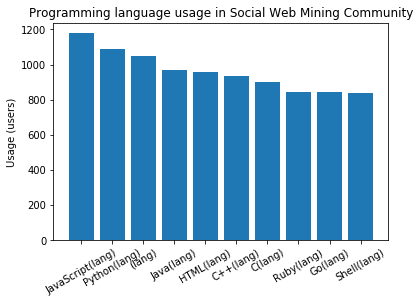

In [16]:
# getting the top 10 popular languages again
from operator import itemgetter

topTenLanguages = sorted([(n, g.in_degree(n))
 for n in g.nodes() 
     if g.node[n]['type'] == 'lang'], key=itemgetter(1), reverse=True)[:10]

# we can plot a bar chart with matplotlib

import matplotlib.pyplot as plt

x_val = [x[0] for x in topTenLanguages]
y_val = [y[1] for y in topTenLanguages]

plt.bar(x_val, y_val)
plt.xticks(x_val, rotation=30)
plt.ylabel('Usage (users)')
plt.title('Programming language usage in Social Web Mining Community')

plt.show()

In [86]:
# sort all the repositories in this community by decreasing popularity
allRepos = sorted([(n,d) for (n,d) in g.in_degree() if g.node[n]['type'] == 'repo'],
                         key=itemgetter(1),
                         reverse=True)

allRepos

[('Mining-the-Social-Web(repo)', 1179),
 ('bootstrap(repo)', 213),
 ('tensorflow(repo)', 211),
 ('d3(repo)', 199),
 ('dotfiles(repo)', 183),
 ('models(repo)', 160),
 ('free-programming-books(repo)', 152),
 ('Mining-the-Social-Web-2nd-Edition(repo)', 145),
 ('awesome(repo)', 145),
 ('go(repo)', 143),
 ('awesome-python(repo)', 139),
 ('keras(repo)', 135),
 ('requests(repo)', 132),
 ('Probabilistic-Programming-and-Bayesian-Methods-for-Hackers(repo)', 127),
 ('system-design-primer(repo)', 123),
 ('blog(repo)', 122),
 ('storm(repo)', 121),
 ('spark(repo)', 120),
 ('scrapy(repo)', 120),
 ('awesome-machine-learning(repo)', 117),
 ('react(repo)', 113),
 ('scikit-learn(repo)', 111),
 ('papers-we-love(repo)', 111),
 ('coding-interview-university(repo)', 109),
 ('oh-my-zsh(repo)', 107),
 ('gitignore(repo)', 104),
 ('awesome-public-datasets(repo)', 103),
 ('reveal.js(repo)', 102),
 ('core(repo)', 100),
 ('examples(repo)', 100),
 ('slate(repo)', 99),
 ('incubator-superset(repo)', 99),
 ('flask(repo

In [87]:
# let's find out what repos a specific user follows
followedRepos = [n for n in g['cheekybastard(user)'] 
                   if g['cheekybastard(user)'][n]['type'] == 'gazes']

followedRepos

['Mining-the-Social-Web(repo)',
 'dramatiq(repo)',
 'Blender_Particle(repo)',
 'Blender_3D_particles(repo)',
 'Pyrr(repo)',
 'GridCell-3D(repo)',
 'PiCube(repo)',
 'pycubedemo(repo)',
 'LED_CUBE(repo)',
 'graph-node(repo)',
 'apollo-angular(repo)',
 'plyvel(repo)',
 'python-bitcoinrpc(repo)',
 'spruned(repo)',
 'BitcoinVisualizations(repo)',
 'statoshi(repo)',
 'btcexport(repo)',
 'statping(repo)',
 'parity-ethereum(repo)',
 'pandas-summary(repo)',
 'ethereum_clustering(repo)',
 'ethereum-etl(repo)',
 'mypy(repo)',
 'black(repo)',
 'quant-trading(repo)',
 'shaka-player(repo)',
 'vidgear(repo)',
 'SGX-Full-OrderBook-Tick-Data-Trading-Strategy(repo)',
 'OrderBook(repo)',
 'backoff(repo)',
 'ant_nest(repo)',
 'aiomultiprocess(repo)',
 'aiologger(repo)',
 'ruia(repo)',
 'PySnooper(repo)',
 'Unipath(repo)',
 'huey(repo)',
 'ethminer(repo)',
 'orm(repo)',
 'nightfall(repo)',
 'ccxt-rest(repo)',
 'alexa_check(repo)',
 'pyppeteer(repo)',
 'requests-async(repo)',
 'ngx-antv-f2(repo)',
 'chartah

In [88]:
# now we can recommend popular repos that the user might be interested in following
recommendedRepos = []
for (repo, stars) in allRepos:
    if repo not in followedRepos:
        recommendedRepos.append(repo)

recommendedRepos[:3]

['bootstrap(repo)', 'tensorflow(repo)', 'd3(repo)']